RESULTS
x1 = 200.0
x2 = 300.0
x3 = 0.0
optimum solution x1,x2,x3 = 1900.0


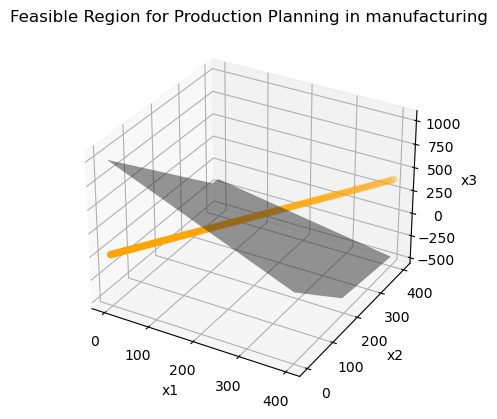

In [3]:
#QUESTION 5

# import libraries
from pulp import *

# define lp
lp = LpProblem(name="production_costs", sense=LpMinimize)

# define decision variables
x1 = LpVariable(name="x1", lowBound=0)
x2= LpVariable(name="x2", lowBound=0)
x3= LpVariable(name="x3", lowBound=0)

# define the objective
lp += 5*x1 + 3*x2 + 4*x3, "objective"

# define constraints
lp += 2*x1 + 3*x2 + 1*x3 <=1000, "raw material"
lp += 4*x1 + 2*x2 + 5*x3 <=120, "labor hours"
lp += x1 >=200
lp += x2 >=300
lp += x3 >=150

# solve
lp.solve()

print("RESULTS")
print(f"x1 = {x1.varValue}")
print(f"x2 = {x2.varValue}")
print(f"x3 = {x3.varValue}")
print(f"optimum solution x1,x2,x3 = {lp.objective.value()}")


# Plotting the feasible region (in 3D space)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(0, 400, 100)
y = np.linspace(0, 400, 100)
x, y = np.meshgrid(x, y)
z1 = (1000 - 2*x - 3*y) / 1
z2 = (120 - 4*x - 2*y) / 5

ax.plot_surface(x, y, np.maximum(z1, z2), alpha=0.5, rstride=100, cstride=100, color='gray', label='Feasible Region')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('Feasible Region for Production Planning in manufacturing')
ax.scatter(x[0], x[1], x[2], color='orange', label='Optimal Solution')

plt.show()
